# Face Morphing


# Overview

Morphing is a technique which is widely used in motion pictures and animations to change one image or shape into another seamlessly.
![Morph Example](https://www.dropbox.com/s/4hdjx3ouacp2srp/obama-trump-morph.gif?dl=1)

## Results without face alignment

Given two images $I$ and $J$, we want to create an in-between image $M$ by blending images $I$ and $J$. Naively, you can blend the images using the following equation at every pixel $(x,y)$:

$$M(x,y) = (1-\alpha)I(x,y)+\alpha J(x,y)$$

![Results without face alignment](https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-faceMorph.png)

## Results with face alignment

- Align the eyes and mouth before blending the images
- For every pixel $(x_i,y_i)$ in image $I$, we need to find its corresponding pixel $(x_j,y_j)$ in image $J$
- Calculate the location $(x_m,y_m)$ of the pixel in the morphed image:
$$x_m = (1 - \alpha)x_i + \alpha x_j$$
$$y_m = (1 - \alpha)y_i + \alpha y_j$$
- Find the intensity of the pixel at $(x_m,y_m)$ using the following equation:
$$M(x_m,y_m) = (1-\alpha)I(x_i, y_i) + \alpha J(x_j,y_j)$$
- **In Face Morphing, the blending parameter $\alpha$ controls both the shape and intensity at the output pixels.**

# Face Morphing step by step

## Step 1: Find Point Correspondences using Facial Landmark Detection

<table>
    <tr>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-facialLandmarkDetection1.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-facialLandmarkDetection1.png" width=600/></a></center></th>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-facialLandmarkDetection2.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-facialLandmarkDetection2.png" width=500/></a></center></th>
    </tr>
    <tr>
    <td colspan="2"><center>Step 1: Facial Landmark Detection</center></td>
    </tr> 
</table>

## Step 2: Coordinate Transformation

- The input facial images can be of very different sizes. 
- We need a way to normalize the faces and bring them to the same reference frame.
- Warp the faces to a $600 \times 600$ image such that the *left corner of the left eye* is at pixel location $( 180, 200 )$ and the *right corner of the right eye* is at pixel location $( 420, 200 )$
<center><a href="https://learnopencv.com/wp-content/uploads/2022/03/opencv4face-coordinate-transformation.jpg"><img src = "https://learnopencv.com/wp-content/uploads/2022/03/opencv4face-coordinate-transformation.jpg" width=1000/></a></center>


## Step 3: Delaunay Triangulation

- In addition to the 68 points, we add the 8 points on the boundary of the two images. 
- This helps blend the background as well. 
- Perform triangulation on the average of the two set of points. 
- The triangulation is calculated only once and stored as list of indices.

<table>
    <tr>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-delaunypoints1.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-delaunypoints1.png"/></a></center></th>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-delaunyTriangle.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-delaunyTriangle.png"/></a></center></th>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-delaunyPoints2.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-delaunyPoints2.png"/></a></center></th>
    </tr>
    <tr>
    <td colspan="3"><center>The points in the output coordinate system are shown in the left and right image. Delaunay triangulation is calculated on the average of the left and right shapes.</center></td>
    </tr> 
</table>


## Step 4 : Warping images and alpha blending

- Find location of all 76 feature points in morphed image
- Calculate affine transforms using `getAffineTransform` for both set of images and the morphed image
- Apply affine transforms calculated in previous step to transform all pixels inside the triangles to the morphed image.
- Alpha blend the wrapped version of both images ($I$ and $J$) calculated in previous step to obtain the final morphed image.

|The left image shows the warped image1. The right image shows the warped image2. The middle image shows the final morphed image where the left and right warped images are blended based on alpha.|
|------|
|<center><a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-warpedalpha.25.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-warpedalpha.25.png"/></a></center> | 
| <center>alpha = 0.25
Note that even though the right image is extremely distorted, it does not affect the final morph as much because its contribution is only equal to alpha (i.e. 25%).</center>     | 
|<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-warpedalpha.5.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-warpedalpha.5.png"/></a></center>|
|<center>alpha = 0.5</center>|
|<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-warpedalpha.75-1.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m5-warpedalpha.75-1.png"/></a></center>|
|<center>alpha = 0.75
Note that even though the left image is extremely distorted, it does not affect the final morph as much because its contribution is only equal to ( 1 - alpha )  (i.e. 25%).</center>|

# Face Morphing Code

In [ ]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/qa8l3ixwfnael53/AABaRgCQjwUuC2wbWBUaYfUEa?dl=1 -O code.zip -q --show-progress
    !unzip -qq code.zip
else:
    pass

code.zip            100%[===================>]  75.73M  89.4MB/s    in 0.8s    
mapname:  conversion of  failed


## Step 1: Import required modules

In [ ]:
import sys
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2: Load the face and landmark detectors

In [ ]:
# Landmark model location
PREDICTOR_PATH = "lbfmodel.yaml"
# facedetector model file location
MODEL = "opencv_face_detector_uint8.pb"
CONFIG_PATH = "opencv_face_detector.pbtxt"

# Get the face detector network instance
faceDetectorNet = cv2.dnn.readNetFromTensorflow(MODEL, CONFIG_PATH)
# Create the landmark detector instance
landmarkDetector = cv2.face.createFacemarkLBF()
landmarkDetector.loadModel(PREDICTOR_PATH)

## Step 3: Read two images for morphing

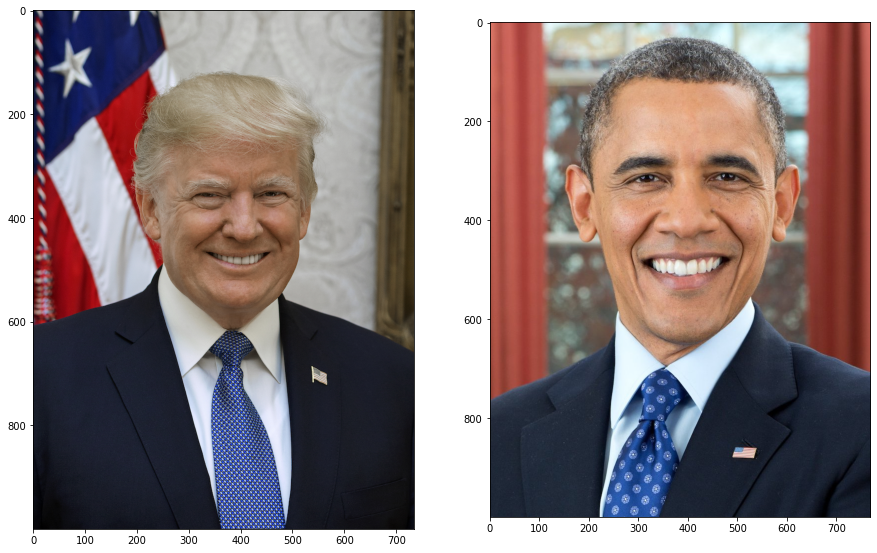

In [ ]:
# Read two images
im1 = cv2.imread("trump.jpg")
im2 = cv2.imread("obama.jpg")

plt.figure(figsize=[15,10])
plt.subplot(121)
plt.imshow(im1[:,:,::-1])
plt.subplot(122)
plt.imshow(im2[:,:,::-1])

## Step 4: Detect landmarks in both images

In [ ]:
# set minimum confidence to filter out faces with low confidence
confidence_threshold = 0.70

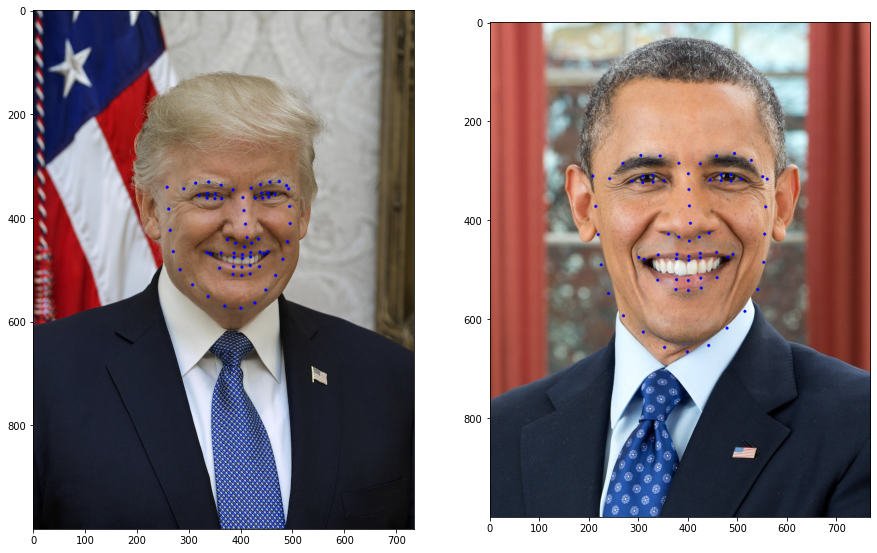

In [ ]:
# Detect landmarks in both images.
points1, im1withLandmarks = fbc.getLandmarks(faceDetectorNet, landmarkDetector, im1, confidence_threshold)
points2, im2withLandmarks = fbc.getLandmarks(faceDetectorNet, landmarkDetector, im2, confidence_threshold)

plt.figure(figsize=[15,10])
plt.subplot(121)
plt.imshow(im1withLandmarks[:,:,::-1])
plt.subplot(122)
plt.imshow(im2withLandmarks[:,:,::-1])

points1 = np.array(points1)
points2 = np.array(points2)

# Convert image to floating point in the range 0 to 1
im1 = np.float32(im1)/255.0
im2 = np.float32(im2)/255.0

## Step 5: Normalize images and landmarks to output coordinates

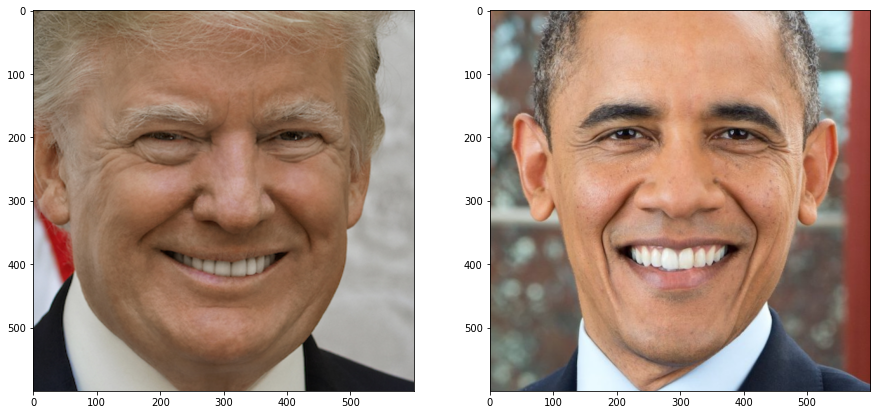

In [ ]:
# Dimensions of output image
h = 600
w = 600

# Normalize image to output coordinates.
imNorm1, points1 = fbc.normalizeImagesAndLandmarks((h, w), im1, points1)
imNorm2, points2 = fbc.normalizeImagesAndLandmarks((h, w), im2, points2)

plt.figure(figsize=[15,15])
plt.subplot(121)
plt.imshow(imNorm1[:,:,::-1])
plt.subplot(122)
plt.imshow(imNorm2[:,:,::-1])

## Step 6: Delaunay Triangulation on Average Points

In [ ]:
# Calculate average points. Will be used for Delaunay triangulation.
pointsAvg = (points1 + points2)/2.0

# 8 Boundary points for Delaunay Triangulation
boundaryPoints = fbc.getEightBoundaryPoints(h, w)
points1 = np.concatenate((points1, boundaryPoints), axis=0)
points2 = np.concatenate((points2, boundaryPoints), axis=0)
pointsAvg = np.concatenate((pointsAvg, boundaryPoints), axis=0)

# Calculate Delaunay triangulation.
rect = (0, 0, w, h)
dt = fbc.calculateDelaunayTriangles(rect, pointsAvg)

## Step 7: Animate using parameter $\alpha$

In [ ]:
alpha = 0
increaseAlpha = True
count = 0
while True:
    count += 1
    writeFileName = "faceMorphing" + str(count).zfill(4) + ".png"
    # Compute landmark points based on morphing parameter alpha
    pointsMorph = (1 - alpha) * points1 + alpha * points2

    # Warp images such that normalized points line up with morphed points.
    imOut1 = fbc.warpImage(imNorm1, points1, pointsMorph.tolist(), dt)
    imOut2 = fbc.warpImage(imNorm2, points2, pointsMorph.tolist(), dt)

    # Blend warped images based on morphing parameter alpha
    imMorph = (1 - alpha) * imOut1 + alpha * imOut2
    
    # Keep animating by ensuring alpha stays between 0 and 1.
    if (alpha <= 0 and not increaseAlpha):
        increaseAlpha = True
    if (alpha >= 1 and increaseAlpha):
        increaseAlpha = False

    if increaseAlpha:
        alpha += 0.05
    else:
        alpha -= 0.05
    plt.imshow(imMorph[:,:,::-1])
    plt.show()    
    imMorph*=255
    cv2.imwrite(writeFileName,imMorph)

    # Stop the program.
    if count == 40:
        break

## Step 8: Create animation from images

In [ ]:
!apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.12).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!convert faceMorphing*.png -loop 0 -delay 100 obama-trump-morph.gif
!rm faceMorphing0*

# Animation

![Face Morphing Animation](https://www.dropbox.com/s/4hdjx3ouacp2srp/obama-trump-morph.gif?dl=1)